In [76]:
import pycurl
import json
from io import BytesIO
from pylab import *

In [192]:


def extractdata(filepath):
    #filepath es el camino que se copia en https://github.com/openfootball/football.json/blob/master

    
    # Initialize a buffer to store the response
    buffer = BytesIO()
    
    # inicializa el objeto Curl
    c = pycurl.Curl()
    
    # URL de origen
    c.setopt(c.URL, 'https://raw.githubusercontent.com/openfootball/football.json/master/' + filepath)
    
    
    # WRITEDATA con buffer
    c.setopt(c.WRITEDATA, buffer)
    
    # Hace el request
    c.perform()
    
    # Cierra el objeto Curl
    c.close()
    
    # Obtiene el contenido de la response
    response = buffer.getvalue()
    
    # Convierte el contenido a string
    response = response.decode('utf-8')
    
    # Convierte el string a JSON
    response = json.loads(response)

    matches = response['matches']

    return matches

def teamdata(equipo,liga):
    #La liga es lo que se obtiene de la función extractdata
    
    #Goles del equipo
    Teamgol_t1 = [] #Primer tiempo
    Teamgol_tt = [] #Tiempo completo

    #Goles de ambos equipos
    Totgol_t1 = [] #Primer tiempo
    Totgol_tt = [] #Tiempo completo

    #Goles del equipo cuando es local
    Locgol_t1 = [] #Primer tiempo
    Locgol_tt = [] #Tiempo completo

    #Goles del equipo cuando es visitante
    Visgol_t1 = [] #Primer tiempo
    Visgol_tt = [] #Tiempo completo

    print('Escaneando a ' + equipo + '...')
    print('Recolectando datos...')
    
    for partido in liga:

        #Comprobar si se jugó el partido
        if 'ht' in partido['score']:
            #Si es local
            if equipo == partido['team1']:
                print(equipo + ' jugó de local contra ' + partido['team2'] + ' el ' + partido['date'])
    
                #Agrega los datos de goles del equipo 
                print('    Recolectando goles del equipo...')
                Teamgol_t1.append(partido['score']['ht'][0])#Primer tiempo
                Teamgol_tt.append(partido['score']['ft'][0])#Tiempo completo
    
                #Agrega los datos de goles de ambos equipos
                print('    Recolectando goles de ambos equipos...')
                Totgol_t1.append(partido['score']['ht'][0]+partido['score']['ht'][1])#Primer tiempo
                Totgol_tt.append(partido['score']['ft'][0]+partido['score']['ft'][1])#Tiempo completo
    
                #Agrega los datos de goles del equipo si es local
                print('    Recolectando goles del equipo si es local...')
                Locgol_t1.append(partido['score']['ft'][0])#Primer tiempo
                Locgol_tt.append(partido['score']['ft'][0])#Tiempo completo
                
                
    
            #Si es visitante
            elif equipo == partido['team2']:
                print(equipo + ' jugó de visitante contra ' + partido['team1'] + ' el ' + partido['date'])
    
                #Agrega los datos de goles del equipo 
                print('    Recolectando goles del equipo...')
                Teamgol_t1.append(partido['score']['ht'][1])#Primer tiempo
                Teamgol_tt.append(partido['score']['ft'][1])#Tiempo completo
    
                #Agrega los datos de goles de ambos equipos
                print('    Recolectando goles de ambos equipos...')
                Totgol_t1.append(partido['score']['ht'][0]+partido['score']['ht'][1])#Primer tiempo
                Totgol_tt.append(partido['score']['ft'][0]+partido['score']['ft'][1])#Tiempo completo
    
                #Agrega los datos de goles del equipo si es local
                print('    Recolectando goles del equipo si es local...')
                Visgol_t1.append(partido['score']['ft'][1])#Primer tiempo
                Visgol_tt.append(partido['score']['ft'][1])#Tiempo completo
    
            #Si no jugó el partido
            else:
                continue
        #Si el partido todavía no se ha jugado o no se jugó
        else:
            continue

    print('Datos recolectados con éxito')
    return Teamgol_t1, Teamgol_tt, Totgol_t1, Totgol_tt, Locgol_t1, Locgol_tt, Visgol_t1, Visgol_tt
        
    
def prob(Datos,x):
    m = mean(Datos)
    s = std(Datos)
    const = 1/(s*sqrt(2*pi))

    return const*exp(-(0.5)*(((x-m)/(s)))**2)

    
    


In [194]:
Liga = '2024-25/en.1.json'
Equipo = 'Manchester City FC'


# Extrae los datos de la Premiere League 2024-2025
partidos = extractdata(Liga)

# Extrae los datos como arreglos
Teamgol_t1, Teamgol_tt, Totgol_t1, Totgol_tt, Locgol_t1, Locgol_tt, Visgol_t1, Visgol_tt = teamdata(Equipo,partidos)

Escaneando a Manchester City FC...
Recolectando datos...
Manchester City FC jugó de visitante contra Chelsea FC el 2024-08-18
    Recolectando goles del equipo...
    Recolectando goles de ambos equipos...
    Recolectando goles del equipo si es local...
Manchester City FC jugó de local contra Ipswich Town FC el 2024-08-24
    Recolectando goles del equipo...
    Recolectando goles de ambos equipos...
    Recolectando goles del equipo si es local...
Manchester City FC jugó de visitante contra West Ham United FC el 2024-08-31
    Recolectando goles del equipo...
    Recolectando goles de ambos equipos...
    Recolectando goles del equipo si es local...
Manchester City FC jugó de local contra Brentford FC el 2024-09-14
    Recolectando goles del equipo...
    Recolectando goles de ambos equipos...
    Recolectando goles del equipo si es local...
Manchester City FC jugó de local contra Arsenal FC el 2024-09-22
    Recolectando goles del equipo...
    Recolectando goles de ambos equipos...

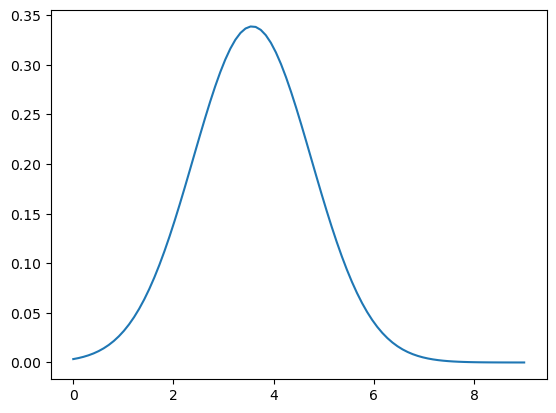

In [238]:
x = linspace(0,9,90)
y = prob(Totgol_tt,x)

plot(x,y)

# Para imprimir los arreglos sin notación científica
#with np.printoptions(precision=3, suppress=True):
    #print(y)


In [ ]:
#